<i><h2 style="text-align:center;color:#004d80"> Prueba: Fundamentos Data Science (G25)</h2></i>
<i><h2 style="text-align:center;color:#004d80"> Desafío 2: Rendimiento escolar </h2></i></i>
<i><h3 style="text-align:center;color:#FFFFF">by: Constanza Córdova </h3></i></i>


<h3 style="color:#004d80"> Preliminares </h3>

_**Descripción:**_ Identificar aquellos alumnos que presentan un bajo desempeño académico, medido en el promedio final del año escolar

Dada el contexto del problema, se determina que es un problema de regresión el cual se deberá desarrollar 3 modelos descriptivos para G1, G2 y G3 y un modelo predictivo para G3. Para la validación del modelo predictivo se hará uso del error cuadrado medio MSE y R2

<h3 style="color:#004d80"> Aspectos </h3>

#### Aspectos Computacionales
**Python:** v 3.8.3

**Librerías:**
- pandas v 1.0.5
- numpy v 1.18.5
- matplotlib v 3.2.2
- scipy v 1.5.0
- seaborn v 0.10.1
- statsmodels v 0.11.1
- scikit-learn v 0.23.1


#### Aspectos adicionales a considerar 
**1. Importación de librerías**

In [168]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sn
import statsmodels.formula.api as snf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import funciones_set as fs

**2. Carga de DataFrame** 

In [169]:
df = pd.read_csv('students.csv', sep='|', encoding = 'UTF-8').drop('Unnamed: 0', axis =1)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,nulidade,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6
1,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
2,GP,F,"""15""",U,LE3,T,1,1,at_home,other,...,4,3,"""2""",2,3,"""3""",10,zero,8,10
3,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
4,GP,F,sem validade,U,GT3,T,3,3,other,other,...,4,3,"""2""",1,2,"""5""",4,6,10,10


**3. Transformación de datos perdidos** 

In [170]:
df = df.replace(['nulidade', 'sem validade', 'zero'], np.nan)
df.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,NaN,U,GT3,A,4,4,at_home,teacher,...,4,3,"""4""",1,1,"""3""",6,5,6,6


- Analizamos los datos perdidos

In [171]:
fs.valores_perdidos(df)

Variable:  school || Valores perdidos:  5 

Variable:  sex || Valores perdidos:  3 

Variable:  age || Valores perdidos:  4 

Variable:  address || Valores perdidos:  2 

Variable:  famsize || Valores perdidos:  4 

Variable:  Pstatus || Valores perdidos:  6 

Variable:  Medu || Valores perdidos:  3 

Variable:  Fedu || Valores perdidos:  5 

Variable:  Mjob || Valores perdidos:  6 

Variable:  Fjob || Valores perdidos:  0 

Variable:  reason || Valores perdidos:  4 

Variable:  guardian || Valores perdidos:  4 

Variable:  traveltime || Valores perdidos:  3 

Variable:  studytime || Valores perdidos:  5 

Variable:  failures || Valores perdidos:  5 

Variable:  schoolsup || Valores perdidos:  8 

Variable:  famsup || Valores perdidos:  5 

Variable:  paid || Valores perdidos:  1 

Variable:  activities || Valores perdidos:  5 

Variable:  nursery || Valores perdidos:  6 

Variable:  higher || Valores perdidos:  6 

Variable:  internet || Valores perdidos:  3 

Variable:  romantic || V

Comentarios: La variable con mayor cantidad de valores perdidos es schoolsup

Se eliminan las celdas vacías 

In [172]:
df_2 = df.copy().dropna()
print(f'Se eliminaron {df.shape[0] - df_2.shape[0]} observaciones del data set')

Se eliminaron 111 observaciones del data set


Reseteamos el indice del dataframe:

In [173]:
df_2.reset_index(level= 0, inplace= True)
df_2.head()

,index,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,GP,F,"""17""",U,GT3,T,1,1,at_home,...,5,3,"""3""",1,1,"""3""",4,5,5,6
1,3,GP,F,"""15""",U,GT3,T,4,2,health,...,3,2,"""2""",1,1,"""5""",2,15,14,15
2,5,GP,M,"""16""",U,LE3,T,4,3,services,...,5,4,"""2""",1,2,"""5""",10,15,15,15
3,6,GP,M,"""16""",U,LE3,T,2,2,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
4,7,GP,F,"""17""",U,GT3,A,4,4,other,...,4,1,"""4""",1,1,"""1""",6,6,5,6


In [174]:
df_2.drop(columns=['index'], inplace= True)
df_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,"""17""",U,GT3,T,1,1,at_home,other,...,5,3,"""3""",1,1,"""3""",4,5,5,6
1,GP,F,"""15""",U,GT3,T,4,2,health,services,...,3,2,"""2""",1,1,"""5""",2,15,14,15
2,GP,M,"""16""",U,LE3,T,4,3,services,other,...,5,4,"""2""",1,2,"""5""",10,15,15,15
3,GP,M,"""16""",U,LE3,T,2,2,other,other,...,4,4,"""4""",1,1,"""3""",0,12,12,11
4,GP,F,"""17""",U,GT3,A,4,4,other,teacher,...,4,1,"""4""",1,1,"""1""",6,6,5,6


**4. Recodificación de las variables** 

Realizamos un análisis del tipo de dato que contiene las variables para convertir aquellas variables de tipo string a integer 

In [175]:
fs.descriptive_var(df_2)

school 
 Index(['GP', 'MS'], dtype='object') 

sex 
 Index(['F', 'M'], dtype='object') 

age 
 Index(['"16"', '"18"', '"15"', '"17"', '"19"', '"20"', '"21"'], dtype='object') 

address 
 Index(['U', 'R'], dtype='object') 

famsize 
 Index(['GT3', 'LE3'], dtype='object') 

Pstatus 
 Index(['T', 'A'], dtype='object') 

Medu 
 Index(['4', '2', '3', '1', '0'], dtype='object') 

Fedu 
 Index(['2', '3', '4', '1', '0'], dtype='object') 

Mjob 
 Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object') 

Fjob 
 Index(['other', 'services', 'teacher', 'health', 'at_home'], dtype='object') 

reason 
 Index(['course', 'home', 'reputation', 'other'], dtype='object') 

guardian 
 Index(['mother', 'father', 'other'], dtype='object') 

traveltime 
 Index(['1', '2', '3', '4'], dtype='object') 

studytime 
 Index(['2', '1', '3', '4'], dtype='object') 

failures 
 Index(['0', '1', '2', '3'], dtype='object') 

schoolsup 
 Index(['no', 'yes'], dtype='object') 

famsup 
 Index(['yes', 'no

Transformamos las variables numéricas a entero

In [176]:
var_numericas = ['age', 'Medu', 'Fedu','traveltime' , 'studytime', 'failures',
                'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
            'absences', 'G1', 'G3' ]

for i in var_numericas:
    df_2[i] = df_2[i].str.replace( '"','').astype(int)

df_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
2,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
3,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
4,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6


<h3 style="color:#004d80"> Descripción </h3>
En esta sección se generará un análisis descriptivo considerando el tipo de variables desde el punto de vista estadístico así como computacional

In [177]:
df_2.describe(include= 'all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,284,284,284.000000,284,284,284,284.000000,284.000000,284,284,...,284.000000,284.00000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,247,147,NaN,214,209,257,NaN,NaN,103,159,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.707746,NaN,NaN,NaN,2.774648,2.521127,NaN,NaN,...,3.940141,3.18662,3.084507,1.482394,2.239437,3.626761,5.588028,10.933099,10.640845,10.394366
std,NaN,NaN,1.284238,NaN,NaN,NaN,1.095409,1.091038,NaN,NaN,...,0.881659,1.02117,1.076527,0.879512,1.285580,1.319113,8.156335,3.289199,3.789220,4.565902
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.00000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,3.000000,NaN,NaN,...,4.000000,3.00000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,10.500000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.00000,4.000000,2.000000,3.000000,5.000000,7.000000,13.000000,13.000000,13.000000


vemos el tipo de variable luego del arreglo del dataframe

In [178]:
fs.descriptive_var(df_2)

school 
 Index(['GP', 'MS'], dtype='object') 

sex 
 Index(['F', 'M'], dtype='object') 

age 
 Int64Index([16, 18, 15, 17, 19, 20, 21], dtype='int64') 

address 
 Index(['U', 'R'], dtype='object') 

famsize 
 Index(['GT3', 'LE3'], dtype='object') 

Pstatus 
 Index(['T', 'A'], dtype='object') 

Medu 
 Int64Index([4, 2, 3, 1, 0], dtype='int64') 

Fedu 
 Int64Index([2, 3, 4, 1, 0], dtype='int64') 

Mjob 
 Index(['other', 'services', 'teacher', 'at_home', 'health'], dtype='object') 

Fjob 
 Index(['other', 'services', 'teacher', 'health', 'at_home'], dtype='object') 

reason 
 Index(['course', 'home', 'reputation', 'other'], dtype='object') 

guardian 
 Index(['mother', 'father', 'other'], dtype='object') 

traveltime 
 Int64Index([1, 2, 3, 4], dtype='int64') 

studytime 
 Int64Index([2, 1, 3, 4], dtype='int64') 

failures 
 Int64Index([0, 1, 2, 3], dtype='int64') 

schoolsup 
 Index(['no', 'yes'], dtype='object') 

famsup 
 Index(['yes', 'no'], dtype='object') 

paid 
 Index(['no', 'yes']

Obtenemos las variables binarias:

In [179]:
variables_binarias = []

for i in list(df_2.columns):
    len_var = len(list(dict(df_2[i].value_counts()).keys()))
    if len_var == 2:
        variables_binarias.append(i)
print(variables_binarias)

['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


Categorizamos las variables restantes:

In [180]:
variables_nominales = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime']

variables_ordinales = ['famrel', 'freetime', 'goout', 'Dalc','Walc', 'health']

variables_cuantitativas = ['failures', 'age', 'absences', 'G1', 'G2', 'G3']

Creamos un diccionario para las variables nominales:

In [181]:
medu = {'Medu':dict(zip([0,1,2,3,4],['ninguna', 'basica_1', 'basica_2', 'media', 'superior']))}
fedu = {'Fedu':dict(zip([0,1,2,3,4],['ninguna', 'basica_1', 'basica_2', 'media', 'superior']))}
mjob = {'Mjob':dict(zip(['other', 'services', 'teacher', 'at_home', 'health'],['other', 'services', 'teacher', 'at_home', 'health']))}
fjob = {'Fjob':dict(zip(['other', 'services', 'teacher', 'at_home', 'health'],['other', 'services', 'teacher', 'at_home', 'health']))}
reason = {'reason':dict(zip(['course', 'home', 'reputation', 'other'],['course', 'home', 'reputation', 'other']))}
guardian = {'guardian':dict(zip(['mother', 'father', 'other'],['mother', 'father', 'other']))}
traveltime = {'traveltime':dict(zip([1,2,3,4],['menor15', '15a30', '30a60', 'mayor60']))}
studytime = {'studytime':dict(zip([1,2,3,4],['menor2', '2a5', '5a10', 'mayor10']))}
failures = {'failures':dict(zip(['0','1','2','3','4'],['0','1','2','3','4']))}

lista_var = [medu,fedu,mjob, fjob, reason, guardian, traveltime, studytime, failures]

dict_nominales = {}

for i in lista_var:
    dict_nominales.update(i)
    
print(dict_nominales)

{'Medu': {0: 'ninguna', 1: 'basica_1', 2: 'basica_2', 3: 'media', 4: 'superior'}, 'Fedu': {0: 'ninguna', 1: 'basica_1', 2: 'basica_2', 3: 'media', 4: 'superior'}, 'Mjob': {'other': 'other', 'services': 'services', 'teacher': 'teacher', 'at_home': 'at_home', 'health': 'health'}, 'Fjob': {'other': 'other', 'services': 'services', 'teacher': 'teacher', 'at_home': 'at_home', 'health': 'health'}, 'reason': {'course': 'course', 'home': 'home', 'reputation': 'reputation', 'other': 'other'}, 'guardian': {'mother': 'mother', 'father': 'father', 'other': 'other'}, 'traveltime': {1: 'menor15', 2: '15a30', 3: '30a60', 4: 'mayor60'}, 'studytime': {1: 'menor2', 2: '2a5', 3: '5a10', 4: 'mayor10'}, 'failures': {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'}}


Recodificamos el data con el nombre de las categorias para las variables nominales:

In [182]:
for i in variables_nominales:
    var_tmp = dict_nominales.get(i)
    keys_tmp = list(var_tmp.keys())
    values_tmp = list(var_tmp.values())

    df_2[i] = df_2[i].replace(keys_tmp, values_tmp)
        
df_2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,basica_1,basica_1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
1,GP,F,15,U,GT3,T,superior,basica_2,health,services,...,3,2,2,1,1,5,2,15,14,15
2,GP,M,16,U,LE3,T,superior,media,services,other,...,5,4,2,1,2,5,10,15,15,15
3,GP,M,16,U,LE3,T,basica_2,basica_2,other,other,...,4,4,4,1,1,3,0,12,12,11
4,GP,F,17,U,GT3,A,superior,superior,other,teacher,...,4,1,4,1,1,1,6,6,5,6


Creamos un nuevo Dataframe renombrado, en este caso se convirtieron las variables binarias a dummies manteniendo el valor 1 para la variable minoritaria 

In [183]:
df_recod = pd.DataFrame()
for var in variables_binarias:
    keys = list(dict(df_2[var].value_counts()).keys())
    column_name = var + '_' + keys[1]
    df_recod[column_name] = np.where(df_2[var] == keys[1], 1, 0)
    
df_recod.head()

,school_MS,sex_M,address_R,famsize_LE3,Pstatus_A,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,higher_no,internet_no,romantic_yes
0,0,0,0,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,1,0,1,0,0,0,1,0,0,0,0,0
3,0,1,0,1,0,0,1,0,1,0,0,0,0
4,0,0,0,0,1,1,0,0,1,0,0,1,0


Transformamos las variables nominales en dummies en el datadrame recodificado. En primer lugar incorporamos las variables nominales al dataframe df_recod y luego se utiliza el metodo get_dummies

In [184]:
for variable in variables_nominales:
    df_recod[variable] = df_2[variable]
df_recod.head()

,school_MS,sex_M,address_R,famsize_LE3,Pstatus_A,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,...,internet_no,romantic_yes,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime
0,0,0,0,0,0,0,0,0,1,1,...,0,0,basica_1,basica_1,at_home,other,course,father,menor15,2a5
1,0,0,0,0,0,0,0,1,0,0,...,0,1,superior,basica_2,health,services,home,mother,menor15,5a10
2,0,1,0,1,0,0,0,1,0,0,...,0,0,superior,media,services,other,reputation,mother,menor15,2a5
3,0,1,0,1,0,0,1,0,1,0,...,0,0,basica_2,basica_2,other,other,home,mother,menor15,2a5
4,0,0,0,0,1,1,0,0,1,0,...,1,0,superior,superior,other,teacher,home,mother,15a30,2a5


In [185]:
df_recod = pd.get_dummies(df_recod, drop_first=False)
df_recod.head()

,school_MS,sex_M,address_R,famsize_LE3,Pstatus_A,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,...,guardian_mother,guardian_other,traveltime_15a30,traveltime_30a60,traveltime_mayor60,traveltime_menor15,studytime_2a5,studytime_5a10,studytime_mayor10,studytime_menor2
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
2,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,1,1,0,0,0
3,0,1,0,1,0,0,1,0,1,0,...,1,0,0,0,0,1,1,0,0,0
4,0,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,0,1,0,0,0


Finalmente incorporamos al nuevo Dataframe las variables ordinales y cuantitativas:

In [186]:
for variable in (variables_ordinales + variables_cuantitativas):
    df_recod[variable] = df_2[variable]
    
df_recod.head()

,school_MS,sex_M,address_R,famsize_LE3,Pstatus_A,schoolsup_yes,famsup_no,paid_yes,activities_no,nursery_no,...,goout,Dalc,Walc,health,failures,age,absences,G1,G2,G3
0,0,0,0,0,0,0,0,0,1,1,...,3,1,1,3,0,17,4,5,5,6
1,0,0,0,0,0,0,0,1,0,0,...,2,1,1,5,0,15,2,15,14,15
2,0,1,0,1,0,0,0,1,0,0,...,2,1,2,5,0,16,10,15,15,15
3,0,1,0,1,0,0,1,0,1,0,...,4,1,1,3,0,16,0,12,12,11
4,0,0,0,0,1,1,0,0,1,0,...,4,1,1,1,0,17,6,6,5,6


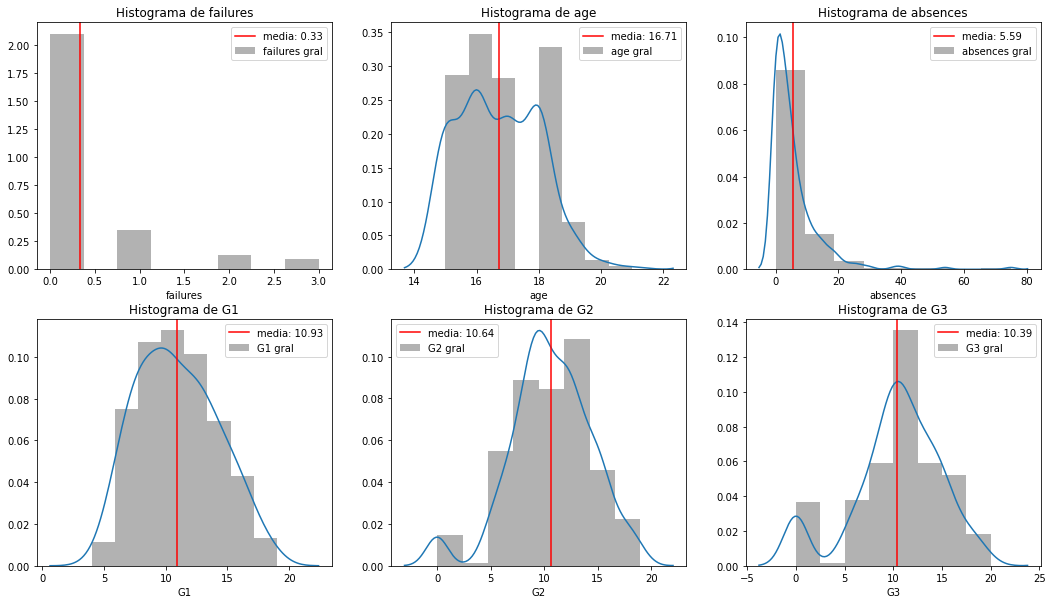

In [187]:
i = 1
plt.figure(figsize = (18,10))
for variable in variables_cuantitativas:

    plt.subplot(2,3, i)
    fs.histograma(df_2, variable, 8)
    i += 1

comentarios: Se observa que la variable failures es categorica. Respeco al número de ausencias, la variable tiene un sesgo positivo. 

Respecto al promedio de notas, el promedio del primer semestre presenta una distribución normal con una media de 10.9. En cambio, se observa que a partir del segundo semestre y promedio final de notas se observan 2 modas, una que se encuentra hacia la izquierda (minoritaria) y la otra centrada en el cetro. Lo anterior nos podría decir que el rendimiento de los alumnos comienza a descender a partir del segundo semestre.

analizaremos las variables cualitativas, categorizando a los alumnos cuyo promedio se encuentre igual o menor al primer cuartil (8) o bien su promegio G3 es superior al 1er cuartil

In [188]:
df_2['q1'] = np.where(df_2['G3'] > 8, '>8', '<=8')

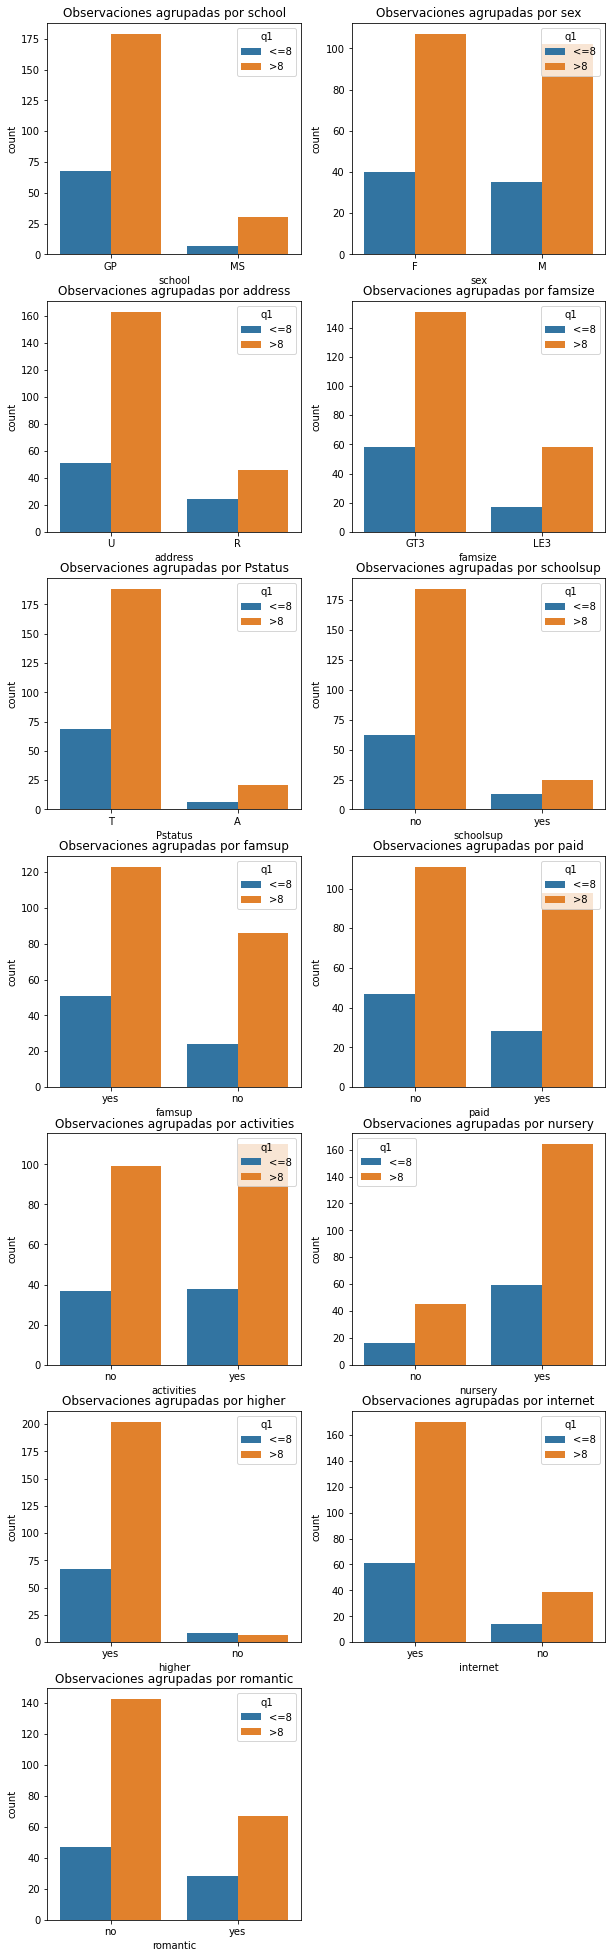

In [189]:
plt.figure(figsize = (10,40))
i = 1
for variable in variables_binarias:
    plt.subplot(8,2, i)
    plt.title(f'Observaciones agrupadas por {variable}')
    sns.countplot(x= variable, hue = 'q1',data= df_2)
    i += 1

Se observa que el conjunto de datos se encuentra desbalanceado para la variable School. 

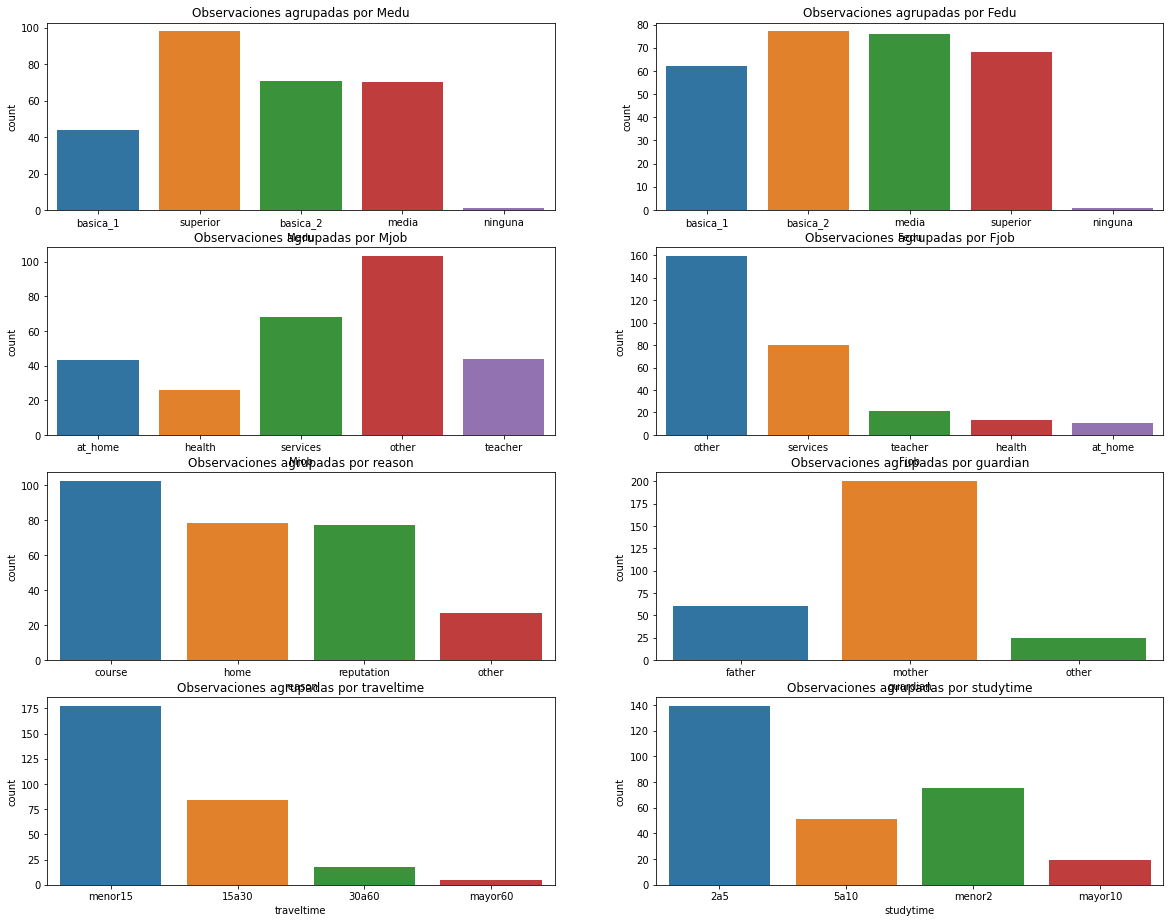

In [190]:
plt.figure(figsize = (20,20))
i = 1
for variable in variables_nominales:
    plt.subplot(5,2, i)
    plt.title(f'Observaciones agrupadas por {variable}')
    sns.countplot(x= variable, data= df_2)
    i += 1

De las variables categóricas se observan las siguientes variables minoritarias:
- Medu: ninguna
- Fedu: ninguna
- Mjob: health
- Fjob: at_home
- reason: other
- guardian: other
- traveltime: mayor a 60 minutos
- studytime: mayor a 10 horas

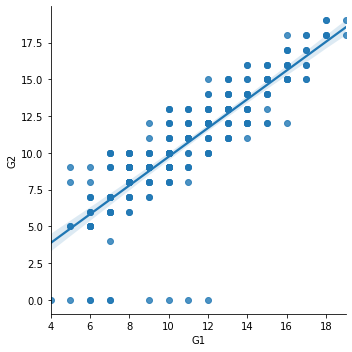

In [191]:
sns.lmplot(x='G1' ,y='G2', data=df_recod)

Comentario: Se observa que existe una correlación entre el promedio de notas del primer semestre respecto al segundo semestre.

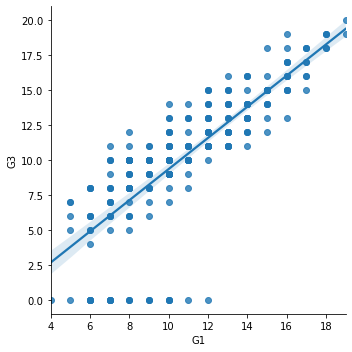

In [192]:
sns.lmplot(x='G1' ,y='G3', data=df_recod)

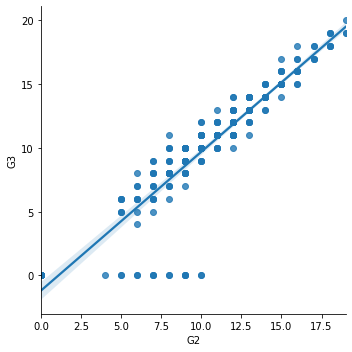

In [193]:
sns.lmplot(x='G2' ,y='G3', data=df_recod)

Se observa que existe una mayor correlación para el promedio de notas final con el promedio de notas del segundo semestre. Sin embargo no existe correlación lineal para el promedio de notas G3 = 0

<h3 style="color:#004d80"> Modelación descriptiva </h3>
En esta sección se busca definir cuáles son los principales determinantes del objeto de estudio.

Declaramos el set de variables con las cuales se trabajarán. Para evitar redundancias en el modelo se reduce el número de variables dummies, se escogió eliminar las variables minoritarias de la categoria variables nominales 

In [195]:
set_var = list(df_recod.columns)

for i in ['Medu_ninguna', 'Fedu_ninguna', 'Mjob_health', 'Fjob_at_home', 'reason_other', 'guardian_other', 'traveltime_mayor60','studytime_mayor10']:
    set_var.remove(i)
    
print(set_var)

['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'schoolsup_yes', 'famsup_no', 'paid_yes', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_yes', 'Medu_basica_1', 'Medu_basica_2', 'Medu_media', 'Medu_superior', 'Fedu_basica_1', 'Fedu_basica_2', 'Fedu_media', 'Fedu_superior', 'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'traveltime_15a30', 'traveltime_30a60', 'traveltime_menor15', 'studytime_2a5', 'studytime_5a10', 'studytime_menor2', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures', 'age', 'absences', 'G1', 'G2', 'G3']


**Modelación para G1**

Primero definimos las variables que formarán parte del modelo descriptivo de G1. Se descarta G2 y G3 en esta instancia ya que estas variables no afectan en las notas obtenidas en el primer semestre G1

In [196]:
x_g1 = list(filter(lambda i: i != 'G1' and i != 'G2' and i !='G3', set_var))
print(x_g1)

['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'schoolsup_yes', 'famsup_no', 'paid_yes', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_yes', 'Medu_basica_1', 'Medu_basica_2', 'Medu_media', 'Medu_superior', 'Fedu_basica_1', 'Fedu_basica_2', 'Fedu_media', 'Fedu_superior', 'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'traveltime_15a30', 'traveltime_30a60', 'traveltime_menor15', 'studytime_2a5', 'studytime_5a10', 'studytime_menor2', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures', 'age', 'absences']


In [197]:
x_g1 = ' + '.join(x_g1)

In [198]:
modelo_desc_g1 = snf.ols('G1 ~' + x_g1, df_recod).fit()
modelo_desc_g1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.372
Model:                            OLS   Adj. R-squared:                  0.241
Method:                 Least Squares   F-statistic:                     2.830
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           8.68e-08
Time:                        15:48:39   Log-Likelihood:                -674.53
No. Observations:                 284   AIC:                             1449.
Df Residuals:                     234   BIC:                             1632.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             14.4115      5.920      2.435      0.016       2.749      26.074
school_MS             -0.4184      0.672     -0.623      0.534      -1.742       0.906
sex_M                  0.7058      0.439      1.609      0.109      -0.159       1.570
address_R             -0.0577      0.494     -0.117      0.907      -1.031       0.916
famsize_LE3            0.3501      0.447      0.784      0.434      -0.530       1.230
Pstatus_A              0.3419      0.652      0.524      0.601      -0.943       1.627
schoolsup_yes         -1.6461      0.568     -2.900      0.004      -2.764      -0.528
famsup_no              1.0824      0.412      2.627      0.009       0.271       1.894
paid_yes               0.0996      0.411      0.243      0.809      -0.709       0.909
activities_no          0.4448      0.374      1.191      0.235      -0.291       1.181
nursery_no             0.0246      0.457      0.054      0.957      -0.877       0.926
higher_no             -1.1123      0.871     -1.277      0.203      -2.829       0.604
internet_no           -0.0201      0.508     -0.039      0.969      -1.021       0.981
romantic_yes           0.0537      0.418      0.128      0.898      -0.770       0.877
Medu_basica_1         -0.7192      3.139     -0.229      0.819      -6.904       5.465
Medu_basica_2         -0.8914      3.087     -0.289      0.773      -6.974       5.191
Medu_media            -1.3087      3.107     -0.421      0.674      -7.430       4.813
Medu_superior         -0.0527      3.135     -0.017      0.987      -6.228       6.123
Fedu_basica_1         -2.4825      3.072     -0.808      0.420      -8.534       3.569
Fedu_basica_2         -1.7154      3.111     -0.551      0.582      -7.844       4.413
Fedu_media            -2.2395      3.102     -0.722      0.471      -8.351       3.872
Fedu_superior         -1.7143      3.149     -0.544      0.587      -7.918       4.490
Mjob_at_home          -0.8353      0.943     -0.886      0.377      -2.693       1.022
Mjob_other            -1.2348      0.811     -1.523      0.129      -2.832       0.362
Mjob_services         -0.1784      0.767     -0.233      0.816      -1.689       1.332
Mjob_teacher          -2.1807      0.792     -2.753      0.006      -3.742      -0.620
Fjob_health           -0.6233      1.305     -0.478      0.633      -3.194       1.947
Fjob_other            -0.9680      0.992     -0.976      0.330      -2.923       0.987
Fjob_services         -0.3120      0.997     -0.313      0.755      -2.277       1.653
Fjob_teacher           1.0800      1.215      0.889      0.375      -1.314       3.474
reason_course          0.1012      0.689      0.147      0.883      -1.256       1.459
reason_home            0.5583      0.723      0.773      0.440      -0.865       1.982
reason_reputation      0.6725      0.7

Evaluamos las variables que son estadísticamente significativas con un 95% de confianza:

In [199]:
sig_g1, no_sig_g1, pval_g1 =  fs.evalua_95_confianza(modelo_desc_g1)

In [200]:
print(f' las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G1 son: {sig_g1}')

 las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G1 son: ['Intercept', 'schoolsup_yes', 'famsup_no', 'Mjob_teacher', 'studytime_2a5', 'studytime_menor2', 'freetime', 'goout', 'health', 'failures']


In [201]:
print(f'Las siguientes variables obtuvieron un p_val > 0.5: {no_sig_g1}')

Las siguientes variables obtuvieron un p_val > 0.5: ['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'paid_yes', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_yes', 'Medu_basica_1', 'Medu_basica_2', 'Medu_media', 'Medu_superior', 'Fedu_basica_1', 'Fedu_basica_2', 'Fedu_media', 'Fedu_superior', 'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'traveltime_15a30', 'traveltime_30a60', 'traveltime_menor15', 'studytime_5a10', 'famrel', 'Dalc', 'Walc', 'age', 'absences']


Comentarios: 

- Se observa que la gran mayoria de las variables binarias estudiadas no son estadisticamente significativas. Por lo que no es posible concluir que exista una asociación estadisticamente significativa entre estas variables y el promedio de notas del primer semestre. 
- Las variables binarias que si son estadisticamente significativas son si es que el alumno tiene apoyo educacional del colegio (schoolsup_yes) y si recibe apoyo educacional familiar (famsup_no)

- Las variables categóricas relacionadas con los padres no son estadisticamente significativas. En cambio, se observa que las variables relacionadas con las horas semanales dedicadas pueden tener un grado de significancia y el número de asignaturas reprobadas

- Respecto a las preguntas relacionadas con los aspectos ambientales del alumno se observa que tiempo libre fuera del colegio (freetime), salida con amigos (goout) y estado de salud (health) son estadisticamente significativas 

**Depuración del modelo descriptivo G1**

Se realizará una depuración del modelo G1, reduciendo aquellas variables que no tuvieron una asociación estadisticamente significativa con la variable objetivo G1.  

In [202]:
x_g1_refact = sig_g1
x_g1_refact.remove('Intercept')

In [203]:
x_g1_refact = ' + '.join(x_g1_refact)
x_g1_refact

'schoolsup_yes + famsup_no + Mjob_teacher + studytime_2a5 + studytime_menor2 + freetime + goout + health + failures'

In [208]:
modelo_desc_g1_refact = snf.ols('G1 ~' + x_g1_refact, df_recod).fit()
modelo_desc_g1_refact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G1   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     9.124
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           4.46e-12
Time:                        15:52:43   Log-Likelihood:                -703.40
No. Observations:                 284   AIC:                             1427.
Df Residuals:                     274   BIC:                             1463.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.9416      0.882     15.798      0.000      12.204      15.679
schoolsup_yes       -1.9261      0.522     -3.691      0.000      -2.954      -0.899
famsup_no            0.6437      0.369      1.743      0.082      -0.083       1.371
Mjob_teacher        -0.3461      0.494     -0.700      0.484      -1.319       0.627
studytime_2a5       -1.0857      0.436     -2.488      0.013      -1.945      -0.227
studytime_menor2    -0.8155      0.509     -1.601      0.111      -1.818       0.187
freetime             0.3573      0.180      1.984      0.048       0.003       0.712
goout               -0.6142      0.171     -3.590      0.000      -0.951      -0.277
health              -0.2781      0.134     -2.070      0.039      -0.543      -0.014
failures            -1.3008      0.248     -5.251      0.000      -1.788      -0.813
==============================================================================
Omnibus:                        7.207   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                4.906
Skew:                           0.177   Prob(JB):                       0.0860
Kurtosis:                       2.462   Cond. No.                         31.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Comentarios: Se observa que el nuevo modelo para G1 tiene un R2 de 0.231, respecto a ello se puede comentar que pese a una reducción considerable de variables, el R2 no mejoró. Además se observa que existe nuevas variables que no son estadisticamente significativas en el modelo.

evaluamos la significancia del modelo

In [209]:
sig_g1_r, no_sig_g1_r, pval_g1_r =  fs.evalua_95_confianza(modelo_desc_g1_refact)

In [210]:
print(f' las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G1 son: {sig_g1_r}')

 las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G1 son: ['Intercept', 'schoolsup_yes', 'studytime_2a5', 'freetime', 'goout', 'health', 'failures']


In [211]:
print(f'Las siguientes variables obtuvieron un p_val > 0.5: {no_sig_g1_r}')

Las siguientes variables obtuvieron un p_val > 0.5: ['famsup_no', 'Mjob_teacher', 'studytime_menor2']


**Modelación para G2**

In [212]:
y_g2 = ['G2']
x_g2 = list(filter(lambda i: i != 'G2' and i !='G3', set_var))
print(x_g2)

['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'schoolsup_yes', 'famsup_no', 'paid_yes', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_yes', 'Medu_basica_1', 'Medu_basica_2', 'Medu_media', 'Medu_superior', 'Fedu_basica_1', 'Fedu_basica_2', 'Fedu_media', 'Fedu_superior', 'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'traveltime_15a30', 'traveltime_30a60', 'traveltime_menor15', 'studytime_2a5', 'studytime_5a10', 'studytime_menor2', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures', 'age', 'absences', 'G1']


In [213]:
x_g2 = ' + '.join(x_g2)

In [214]:
modelo_desc_g2 = snf.ols('G2 ~' + x_g2, df_recod).fit()
modelo_desc_g2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     16.52
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           4.75e-53
Time:                        15:53:14   Log-Likelihood:                -565.81
No. Observations:                 284   AIC:                             1234.
Df Residuals:                     233   BIC:                             1420.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.8120      4.096      1.175      0.241      -3.259      12.883
school_MS              0.5411      0.460      1.177      0.240      -0.364       1.447
sex_M                  0.1018      0.301      0.338      0.736      -0.492       0.696
address_R             -0.7235      0.338     -2.142      0.033      -1.389      -0.058
famsize_LE3            0.1466      0.306      0.480      0.632      -0.456       0.749
Pstatus_A              0.4089      0.446      0.917      0.360      -0.470       1.288
schoolsup_yes          0.7319      0.395      1.854      0.065      -0.046       1.510
famsup_no              0.0639      0.286      0.224      0.823      -0.499       0.627
paid_yes               0.4230      0.281      1.507      0.133      -0.130       0.976
activities_no         -0.2501      0.256     -0.977      0.330      -0.755       0.254
nursery_no            -0.1943      0.313     -0.621      0.535      -0.810       0.422
higher_no             -0.0283      0.597     -0.047      0.962      -1.205       1.149
internet_no           -0.3943      0.347     -1.136      0.257      -1.078       0.290
romantic_yes          -0.5915      0.286     -2.071      0.039      -1.154      -0.029
Medu_basica_1         -0.6231      2.146     -0.290      0.772      -4.850       3.604
Medu_basica_2         -0.6611      2.110     -0.313      0.754      -4.819       3.497
Medu_media            -0.5044      2.124     -0.237      0.812      -4.690       3.681
Medu_superior         -0.1538      2.142     -0.072      0.943      -4.374       4.067
Fedu_basica_1         -1.8237      2.102     -0.868      0.387      -5.965       2.318
Fedu_basica_2         -1.9035      2.127     -0.895      0.372      -6.095       2.288
Fedu_media            -2.3765      2.122     -1.120      0.264      -6.558       1.805
Fedu_superior         -2.5362      2.153     -1.178      0.240      -6.779       1.706
Mjob_at_home          -0.2245      0.645     -0.348      0.728      -1.496       1.047
Mjob_other             0.2425      0.557      0.436      0.663      -0.854       1.339
Mjob_services         -0.0614      0.524     -0.117      0.907      -1.094       0.971
Mjob_teacher          -0.2363      0.550     -0.429      0.668      -1.320       0.848
Fjob_health            0.6441      0.892      0.722      0.471      -1.114       2.402
Fjob_other             0.7473      0.679      1.100      0.273      -0.591       2.086
Fjob_services          1.0636      0.682      1.561      0.120      -0.279       2.407
Fjob_teacher           0.2162      0.832      0.260      0.795      -1.423       1.855
reason_course         -0.6281      0.471     -1.334      0.184      -1.556       0.300
reason_home           -0.5140      0.494     -1.040      0.300      -1.488       0.460
reason_reputation     -0.5494      0.4

In [215]:
sig_g2, no_sig_g2, pval_g2 =  fs.evalua_95_confianza(modelo_desc_g2)
print(f' las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G2 son: {sig_g2}')

 las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G2 son: ['address_R', 'romantic_yes', 'G1']


Comentarios: Del modelo descriptivo para G2 observamos que existe una alta correlación con R2 = 0.78. Sin embargo se observa que la mayoría de los factores son son estadisticamente significativos. Las variables significativas del modelo son address_R, romantic_yes y G1

**Depuración del modelo G2**

In [216]:
x_g2_r = sig_g2

In [217]:
x_g2_r = ' + '.join(x_g2_r)
x_g2_r

'address_R + romantic_yes + G1'

In [218]:
modelo_desc_g2_refact = snf.ols('G2 ~' + x_g2_r, df_recod).fit()
modelo_desc_g2_refact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G2   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     262.9
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           4.22e-81
Time:                        15:53:48   Log-Likelihood:                -590.62
No. Observations:                 284   AIC:                             1189.
Df Residuals:                     280   BIC:                             1204.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.5115      0.422      1.211      0.227      -0.320       1.343
address_R       -0.8709      0.269     -3.237      0.001      -1.400      -0.341
romantic_yes    -0.7129      0.245     -2.906      0.004      -1.196      -0.230
G1               0.9679      0.035     27.404      0.000       0.898       1.037
==============================================================================
Omnibus:                      150.193   Durbin-Watson:                   1.193
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1073.152
Skew:                          -2.051   Prob(JB):                    9.29e-234
Kurtosis:                      11.595   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [219]:
sig_g2_r, no_sig_g2_r, pval_g2_r =  fs.evalua_95_confianza(modelo_desc_g2_refact)
print(f' las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G2 son: {sig_g2_r}')

 las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G2 son: ['address_R', 'romantic_yes', 'G1']


Comentarios: Se observa que el R2 disminuyó un poco respecto al primer modelo realizado, sin embargo,  el modelo depurado  para G2 describe bien al vector objetivo con tres variables: address, romantic y G1.

El promedio de notas del segundo semestre tiene una fuerte relación con el promedio de notas del primer semestre. La ubicación de la casa y si el alumno está en una relación romántica afectan negativamente en el promedio de notas G2

**Modelación para G3**

In [220]:
x_g3 = list(filter(lambda i: i !='G3', set_var))
print(x_g3)

['school_MS', 'sex_M', 'address_R', 'famsize_LE3', 'Pstatus_A', 'schoolsup_yes', 'famsup_no', 'paid_yes', 'activities_no', 'nursery_no', 'higher_no', 'internet_no', 'romantic_yes', 'Medu_basica_1', 'Medu_basica_2', 'Medu_media', 'Medu_superior', 'Fedu_basica_1', 'Fedu_basica_2', 'Fedu_media', 'Fedu_superior', 'Mjob_at_home', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_reputation', 'guardian_father', 'guardian_mother', 'traveltime_15a30', 'traveltime_30a60', 'traveltime_menor15', 'studytime_2a5', 'studytime_5a10', 'studytime_menor2', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'failures', 'age', 'absences', 'G1', 'G2']


In [221]:
x_g3 = ' + '.join(x_g3)

In [222]:
modelo_desc_g3 = snf.ols('G3 ~' + x_g3, df_recod).fit()
modelo_desc_g3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     28.30
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.03e-74
Time:                        15:54:03   Log-Likelihood:                -553.03
No. Observations:                 284   AIC:                             1210.
Df Residuals:                     232   BIC:                             1400.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.4652      3.936     -0.118      0.906      -8.220       7.290
school_MS              0.8028      0.442      1.818      0.070      -0.067       1.673
sex_M                  0.1084      0.289      0.375      0.708      -0.461       0.678
address_R             -0.1299      0.327     -0.397      0.691      -0.774       0.514
famsize_LE3           -0.0488      0.293     -0.167      0.868      -0.626       0.529
Pstatus_A              0.5375      0.428      1.256      0.210      -0.306       1.381
schoolsup_yes          0.1781      0.381      0.468      0.641      -0.573       0.929
famsup_no             -0.2510      0.274     -0.917      0.360      -0.790       0.288
paid_yes               0.1571      0.270      0.581      0.562      -0.375       0.689
activities_no          0.3815      0.246      1.552      0.122      -0.103       0.866
nursery_no             0.0423      0.300      0.141      0.888      -0.548       0.633
higher_no             -0.3696      0.572     -0.646      0.519      -1.497       0.758
internet_no            0.1172      0.334      0.351      0.726      -0.540       0.774
romantic_yes          -0.3980      0.276     -1.442      0.151      -0.942       0.146
Medu_basica_1          0.9072      2.056      0.441      0.659      -3.143       4.958
Medu_basica_2          0.7057      2.022      0.349      0.727      -3.279       4.690
Medu_media             1.3015      2.035      0.639      0.523      -2.709       5.312
Medu_superior          1.2575      2.052      0.613      0.541      -2.786       5.301
Fedu_basica_1         -0.8757      2.017     -0.434      0.665      -4.850       3.099
Fedu_basica_2         -1.7608      2.042     -0.862      0.389      -5.783       2.262
Fedu_media            -1.2651      2.039     -0.620      0.536      -5.282       2.752
Fedu_superior         -1.8841      2.069     -0.911      0.363      -5.961       2.193
Mjob_at_home          -0.0207      0.618     -0.033      0.973      -1.239       1.198
Mjob_other             0.3953      0.534      0.741      0.460      -0.656       1.446
Mjob_services          0.1410      0.502      0.281      0.779      -0.848       1.130
Mjob_teacher          -0.0185      0.527     -0.035      0.972      -1.057       1.020
Fjob_health           -0.1677      0.856     -0.196      0.845      -1.854       1.518
Fjob_other            -0.4850      0.653     -0.743      0.458      -1.771       0.801
Fjob_services         -0.5808      0.656     -0.885      0.377      -1.874       0.712
Fjob_teacher          -0.3951      0.797     -0.496      0.621      -1.966       1.176
reason_course         -0.3826      0.453     -0.845      0.399      -1.275       0.510
reason_home           -0.5859      0.475     -1.234      0.218      -1.521       0.349
reason_reputation     -0.0377      0.4

In [223]:
sig_g3, no_sig_g3, pval_g3 =  fs.evalua_95_confianza(modelo_desc_g3)
print(f' las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G3 son: {sig_g3}')

 las variables que son estadisticamente significativas con un 95% de confianza para el modelo OLS del vector G3 son: ['famrel', 'Walc', 'absences', 'G1', 'G2']


Comentarios: Se observa que el modelo descriptivo para G3 se describe bien con las variables en estudio. Sin embargo sólo 5 variables explican el modelo con un 95% de significancia 

**Depuración del modelo G3**

In [224]:
x_g3_r = sig_g3
x_g3_r

['famrel', 'Walc', 'absences', 'G1', 'G2']

In [225]:
x_g3_r = ' + '.join(x_g3_r)

In [226]:
modelo_desc_g3_refact = snf.ols('G3 ~' + x_g3_r, df_recod).fit()
modelo_desc_g3_refact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     G3   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     274.6
Date:                Mon, 07 Dec 2020   Prob (F-statistic):          2.74e-105
Time:                        15:54:21   Log-Likelihood:                -580.80
No. Observations:                 284   AIC:                             1174.
Df Residuals:                     278   BIC:                             1195.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9531      0.697     -5.670      0.000      -5.326      -2.581
famrel         0.3926      0.128      3.056      0.002       0.140       0.646
Walc           0.1606      0.089      1.797      0.073      -0.015       0.337
absences       0.0351      0.014      2.521      0.012       0.008       0.063
G1             0.1849      0.065      2.842      0.005       0.057       0.313
G2             0.9608      0.056     17.087      0.000       0.850       1.071
==============================================================================
Omnibus:                      176.342   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1217.142
Skew:                          -2.558   Prob(JB):                    5.02e-265
Kurtosis:                      11.757   Cond. No.                         111.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h3 style="color:#004d80"> Modelación Predictiva </h3>
En esta sección se implementará una solución analítica que aumente las métricas de desempeño

**Generar subconjunto de entrenamiento y prueba**

In [227]:
y_vector = df_recod['G3']
x_matriz = df_recod.loc[:,:'G2'].drop(['Medu_ninguna', 'Fedu_ninguna', 'Mjob_health', 'Fjob_at_home', 'reason_other', 'guardian_other', 'traveltime_mayor60','studytime_mayor10'], axis=1)

In [228]:
x_train, x_test, y_train, y_test = train_test_split(x_matriz, y_vector, test_size = .33, random_state = 1901 )

Generamos un modelo de regresión lineal sin estandarización 

In [229]:
modelo_g3_v1 = LinearRegression(fit_intercept=True, normalize=True).fit(x_train, y_train)
predict_g3_v1 = modelo_g3_v1.predict(x_test)

In [230]:
fs.report_scores(predict_g3_v1, y_test)

MSE:  5.6
R2:  0.68


Se observa que el modelo presenta un bajo error cuadrático medio y un R2 aceptable 

Estandarizamos los conjuntospara realizar una prueba del modelo estandarizado

In [231]:
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)

In [232]:
modelo_g3_std_v1 = LinearRegression(fit_intercept=True, normalize=True).fit(x_train_std, y_train)
predict_g3_std_v1 = modelo_g3_std_v1.predict(x_test_std)

In [233]:
fs.report_scores(predict_g3_std_v1, y_test)

MSE:  5.8
R2:  0.65


Se observa que el modelo con los valores estandarizados presenta valores similares que el modelo sin estandarizar. Esto se puede deber a que las variables estudiadas en el modelo son en su mayoría categóricas

Comparamos los valores predichos por ambos modelos:
    - model_v1 : Modelo versión 1 sin estandarizar
    - model_std_v1: Modelo versión 1 estandarizado

In [234]:
df_predicciones_v1 = pd.DataFrame({'G3' : y_test.values, 'model_v1' : predict_g3_v1 , 'model_std_v1' : predict_g3_std_v1})
df_predicciones_v1

,G3,model_v1,model_std_v1
0,8,4.842979,5.196515
1,6,2.941202,3.093241
2,12,9.600289,9.502220
3,6,4.625404,4.759598
4,14,14.375003,14.163707
...,...,...,...
89,12,11.831823,11.559904
90,17,16.896789,16.705821
91,10,8.253031,8.302548
92,12,11.573987,11.491692


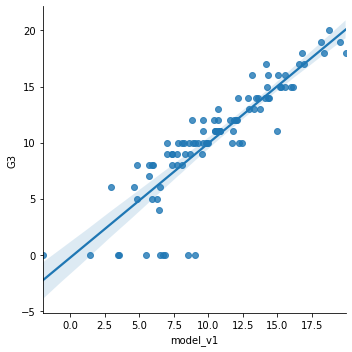

In [235]:
sns.lmplot(x='model_v1' ,y= 'G3', data=df_predicciones_v1)

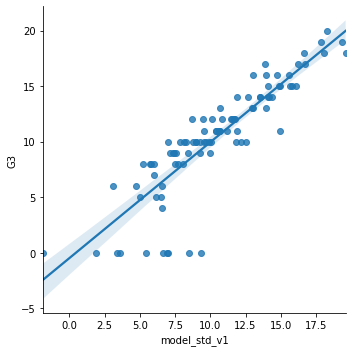

In [236]:
sns.lmplot(x='model_std_v1' ,y='G3', data=df_predicciones_v1)

Comentario: Se observa que los modelos generados predicen aceptablemente el promedio de notas G3 cuando las notas promedios son superior a 5. Para el grupo de notas igual a cero el modelo no predice correctamente

**Estudio de modelo Sin intercepto**

Estudiamos modelo sin intercepto y sin estandarizar

In [237]:
modelo_g3_v2 = LinearRegression(fit_intercept=False, normalize= False).fit(x_train, y_train)
predict_g3_v2 = modelo_g3_v2.predict(x_test)

In [238]:
fs.report_scores(predict_g3_v2, y_test)

MSE:  5.6
R2:  0.69


Comentarios: No se observan gran diferencia entre el error cuadrado medio y del R2 entre el modelo con intercepto y modelo sin intercepto

Estandarizamos los conjuntos 

In [239]:
modelo_g3_std_v2 = LinearRegression(fit_intercept=False, normalize= False).fit(x_train_std, y_train)
predict_g3_std_v2 = modelo_g3_std_v2.predict(x_test_std)

In [240]:
fs.report_scores(predict_g3_std_v2, y_test)

MSE:  1.4090845441020116e+28
R2:  0.0


Se observa que el modelo estándarizado sin intercepto y sin normalizar presenta un error cuadratico medio de gran magnitud, este modelo no sirve para predecir el promedio de los alumnos

In [241]:
df_predicciones_v2 = pd.DataFrame({'G3' : y_test.values, 'model_v2' : predict_g3_v2 , 'model_std_v2' : predict_g3_std_v2})
df_predicciones_v2

,G3,model_v2,model_std_v2
0,8,4.842979,8.079446e+12
1,6,2.941202,4.761701e+13
2,12,9.600289,4.761701e+13
3,6,4.625404,-8.466735e+13
4,14,14.375003,4.761701e+13
...,...,...,...
89,12,11.831823,4.761701e+13
90,17,16.896789,4.761701e+13
91,10,8.253031,4.761701e+13
92,12,11.573987,8.079446e+12


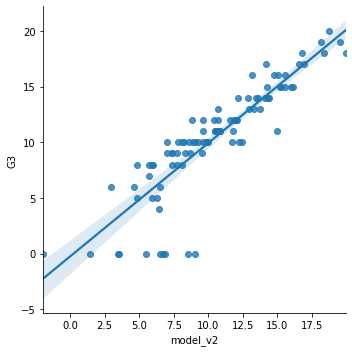

In [242]:
sns.lmplot(x='model_v2' ,y='G3', data=df_predicciones_v2)

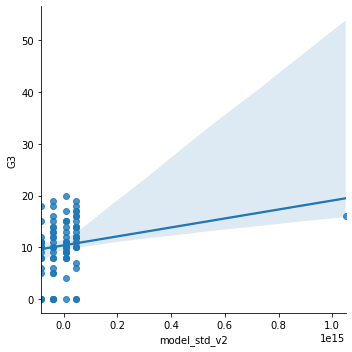

In [243]:
sns.lmplot(x='model_std_v2' ,y='G3', data=df_predicciones_v2)

comentarios: Se observa que los modelos tienen un buen ajuste, a excepción del modelo estandarizado sin intercepción y sin normalización. 
Por lo que se observa en los gráficos, aquellos alumnos que tienen promedio 0 no se predicen correctamente. Se observa que sobre un promedio aprox de 5 el modelo presenta un desempeño aceptable. 

<h3 style="color:#004d80"> Dimensionalidad y agrupación </h3>

Se inspeccionará la bateria de preguntas asociadas a aspectos ambientales del alumnos y evaluar si se pueden categorizar

In [244]:
import factor_analyzer as factor
import missingno as msgn

In [245]:
set_preguntas = df_recod.loc[:, 'famrel':'health']

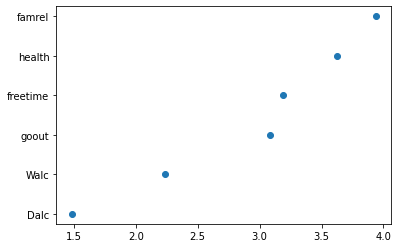

In [246]:
variable, mean = [], []
for colname, serie in set_preguntas.iteritems():
   
    variable.append(colname)
    
    mean.append(serie.mean())
    
tmp_df = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.plot(tmp_df['mean'], tmp_df['var'],'o')

Del gráfico anterior se observa que la relación familiar del grupo de alumnos en estudio es buena con un promedio de 4 aprox. Luego le siguen la salud y el tiempo libre. El consumo de alcohol en días de semana es muy bajo.

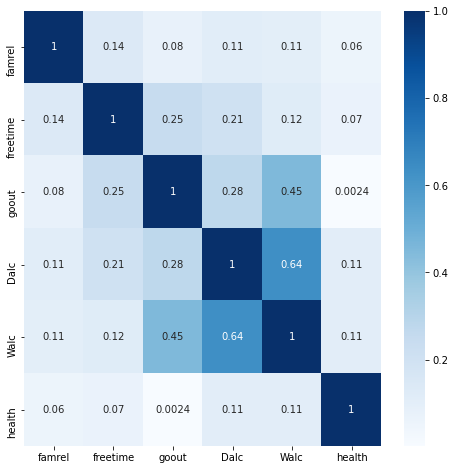

In [247]:
plt.figure(figsize=(8, 8))
sns.heatmap(set_preguntas.corr().abs(), cmap='Blues', annot=True)

Del mapa de calor se observa que existe una correlación sobre 0.4 entre el consumo de alcohol los fines de semana (Walc), la salida con amigos (goout) y el consumo de alcohol los días de semana (Dalc)

**Prueba de esfericidad de Barlett**
- Hipotesis nula: La matriz de correlaciones es una matriz de identidad
- Hipótesis Alternativa: La matriz de correlaciones no es una matriz de identidad

In [248]:
factor.calculate_bartlett_sphericity(set_preguntas)

(264.4978629665065, 6.038167101269206e-48)

Se observa que P-val es menor a 0.05, por lo que existe evidencia para rechazar la hipotesis nula, por lo que por lo menos existe algún grado de covarianza entre los items

**Prueba de Kaiser-Meyer-Olkin**

In [249]:
factor.calculate_kmo(set_preguntas)

(array([0.50173343, 0.57692329, 0.61683967, 0.58664172, 0.5554092 ,
        0.59265861]),
 0.5767240731164592)

Se observa que los indices de KMO son mayores a 0.5, por lo que se podría aplicar un Análisis Factorial. Sin embargo los indices son bajos 

**Se genera un modelo y Scree plot**

In [250]:
factorize = factor.FactorAnalyzer(n_factors=3, rotation= None).fit(set_preguntas)

Text(0.5, 1.0, 'Scree plot')

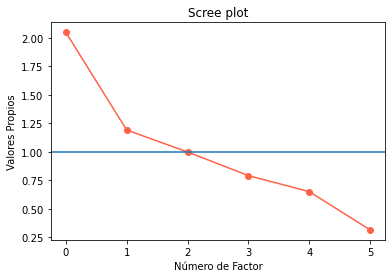

In [251]:
factor_screenplot = factorize.get_eigenvalues()[0]

plt.plot(factor_screenplot, 'o-', color = 'tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot")

De acuerdo al Scree plot se observa qye para los valores propios existen 2 factores mayores a 1, por lo que se podría refactorizar con 2 dimensiones 

In [252]:
factorize_2 = factor.FactorAnalyzer(n_factors= 2, rotation= None).fit(set_preguntas)

In [253]:
factor_loadings = factorize_2.loadings_
factor_loadings = pd.DataFrame(factor_loadings, set_preguntas.columns, columns=['F1', 'F2'])
factor_loadings

,F1,F2
famrel,-0.057851,0.329004
freetime,0.276030,0.524161
goout,0.483823,0.220603
Dalc,0.650816,-0.035508
Walc,0.973496,-0.222297
health,0.115976,0.061481


In [254]:
factor_loadings.applymap( lambda x: np.where( x<.4, '', round(x,2)))

,F1,F2
famrel,,
freetime,,0.52
goout,0.48,
Dalc,0.65,
Walc,0.97,
health,,


De lo anterior se observa lo siguiente:
- Existe un factor F1 con cargas altas para el grupo de preguntas goout, Dalc y Walc, este grupo de preguntas se podrían categorizar como consumo de alcohol.
- Respecto al factor 2 se ve que existen altas cargas solo para la variable freetime 

In [255]:
loadings_ss, proporcion_var, var_acum = factorize_2.get_factor_variance()
print(f'Los 2 factores capturan el {int(var_acum[1].round(2)*100)}% de la varianza')

Los 2 factores capturan el 36% de la varianza


**Extracción de los puntajes del modelo factorial**

In [256]:
factores_score = pd.DataFrame(factorize_2.transform(set_preguntas), columns=['F1', 'F2'])
factores_score

,F1,F2
0,-0.919331,0.489150
1,-1.130229,-0.588424
2,-0.058181,0.432378
3,-0.782000,0.957461
4,-1.223290,-0.481644
...,...,...
279,2.386883,0.622546
280,1.425619,-0.119174
281,0.888120,0.917422
282,1.416115,-0.521043
